In [1]:
import pennylane as qml
import torch
import numpy as np

In [2]:
import time

In [3]:
qpu = qml.device('qiskit.ibmq', wires=1, backend='ibmq_essex',shots=100)
#qpu = qml.device('qiskit.ibmq', wires=1, backend='ibmq_london',shots=100)
#qpu = qml.device('qiskit.ibmq', wires=1, backend='ibmq_vigo',shots=100)
#qpu = qml.device('strawberryfields.fock', wires=1, cutoff_dim=10)
#qpu = qml.device('strawberryfields.gaussian', wires=1)
#qpu = qml.device('qiskit.aer', wires=1)

In [4]:
@qml.qnode(qpu,interface='torch')
def circuit(alpha,beta,phi,theta):
    #qml.BasisState(np.asarray([0,0]),wires=[0,1])
    qml.RX(alpha,wires=0)
    qml.RZ(beta,wires=0)
    qml.RX(theta,wires=0)
    qml.RZ(phi,wires=0)
    return qml.expval(qml.PauliZ(0))

In [5]:
from torch.nn.parameter import Parameter

In [6]:
class QCircuitNet(torch.nn.Module):
    def __init__(self):
        super(QCircuitNet, self).__init__()
        self.phi=Parameter(torch.tensor(0.0))
        self.theta=Parameter(torch.tensor(0.0))
        
    def forward(self,alpha,beta):
        return circuit(alpha,beta,self.phi,self.theta)

In [7]:
model=QCircuitNet()

In [8]:
for p in model.named_parameters():
    print(p)

('phi', Parameter containing:
tensor(0., requires_grad=True))
('theta', Parameter containing:
tensor(0., requires_grad=True))


In [9]:
target=-1

In [10]:
def cost(value,target):
    return torch.abs(value-target)**2

In [11]:
opt=torch.optim.Adam(model.parameters(),lr=0.1)

In [12]:
alpha=torch.tensor(0.0)
beta=torch.tensor(0.0)

In [13]:
print(alpha.grad)

None


In [14]:
print(model.theta.grad)

None


In [15]:
value=model(alpha,beta)

This was one job:
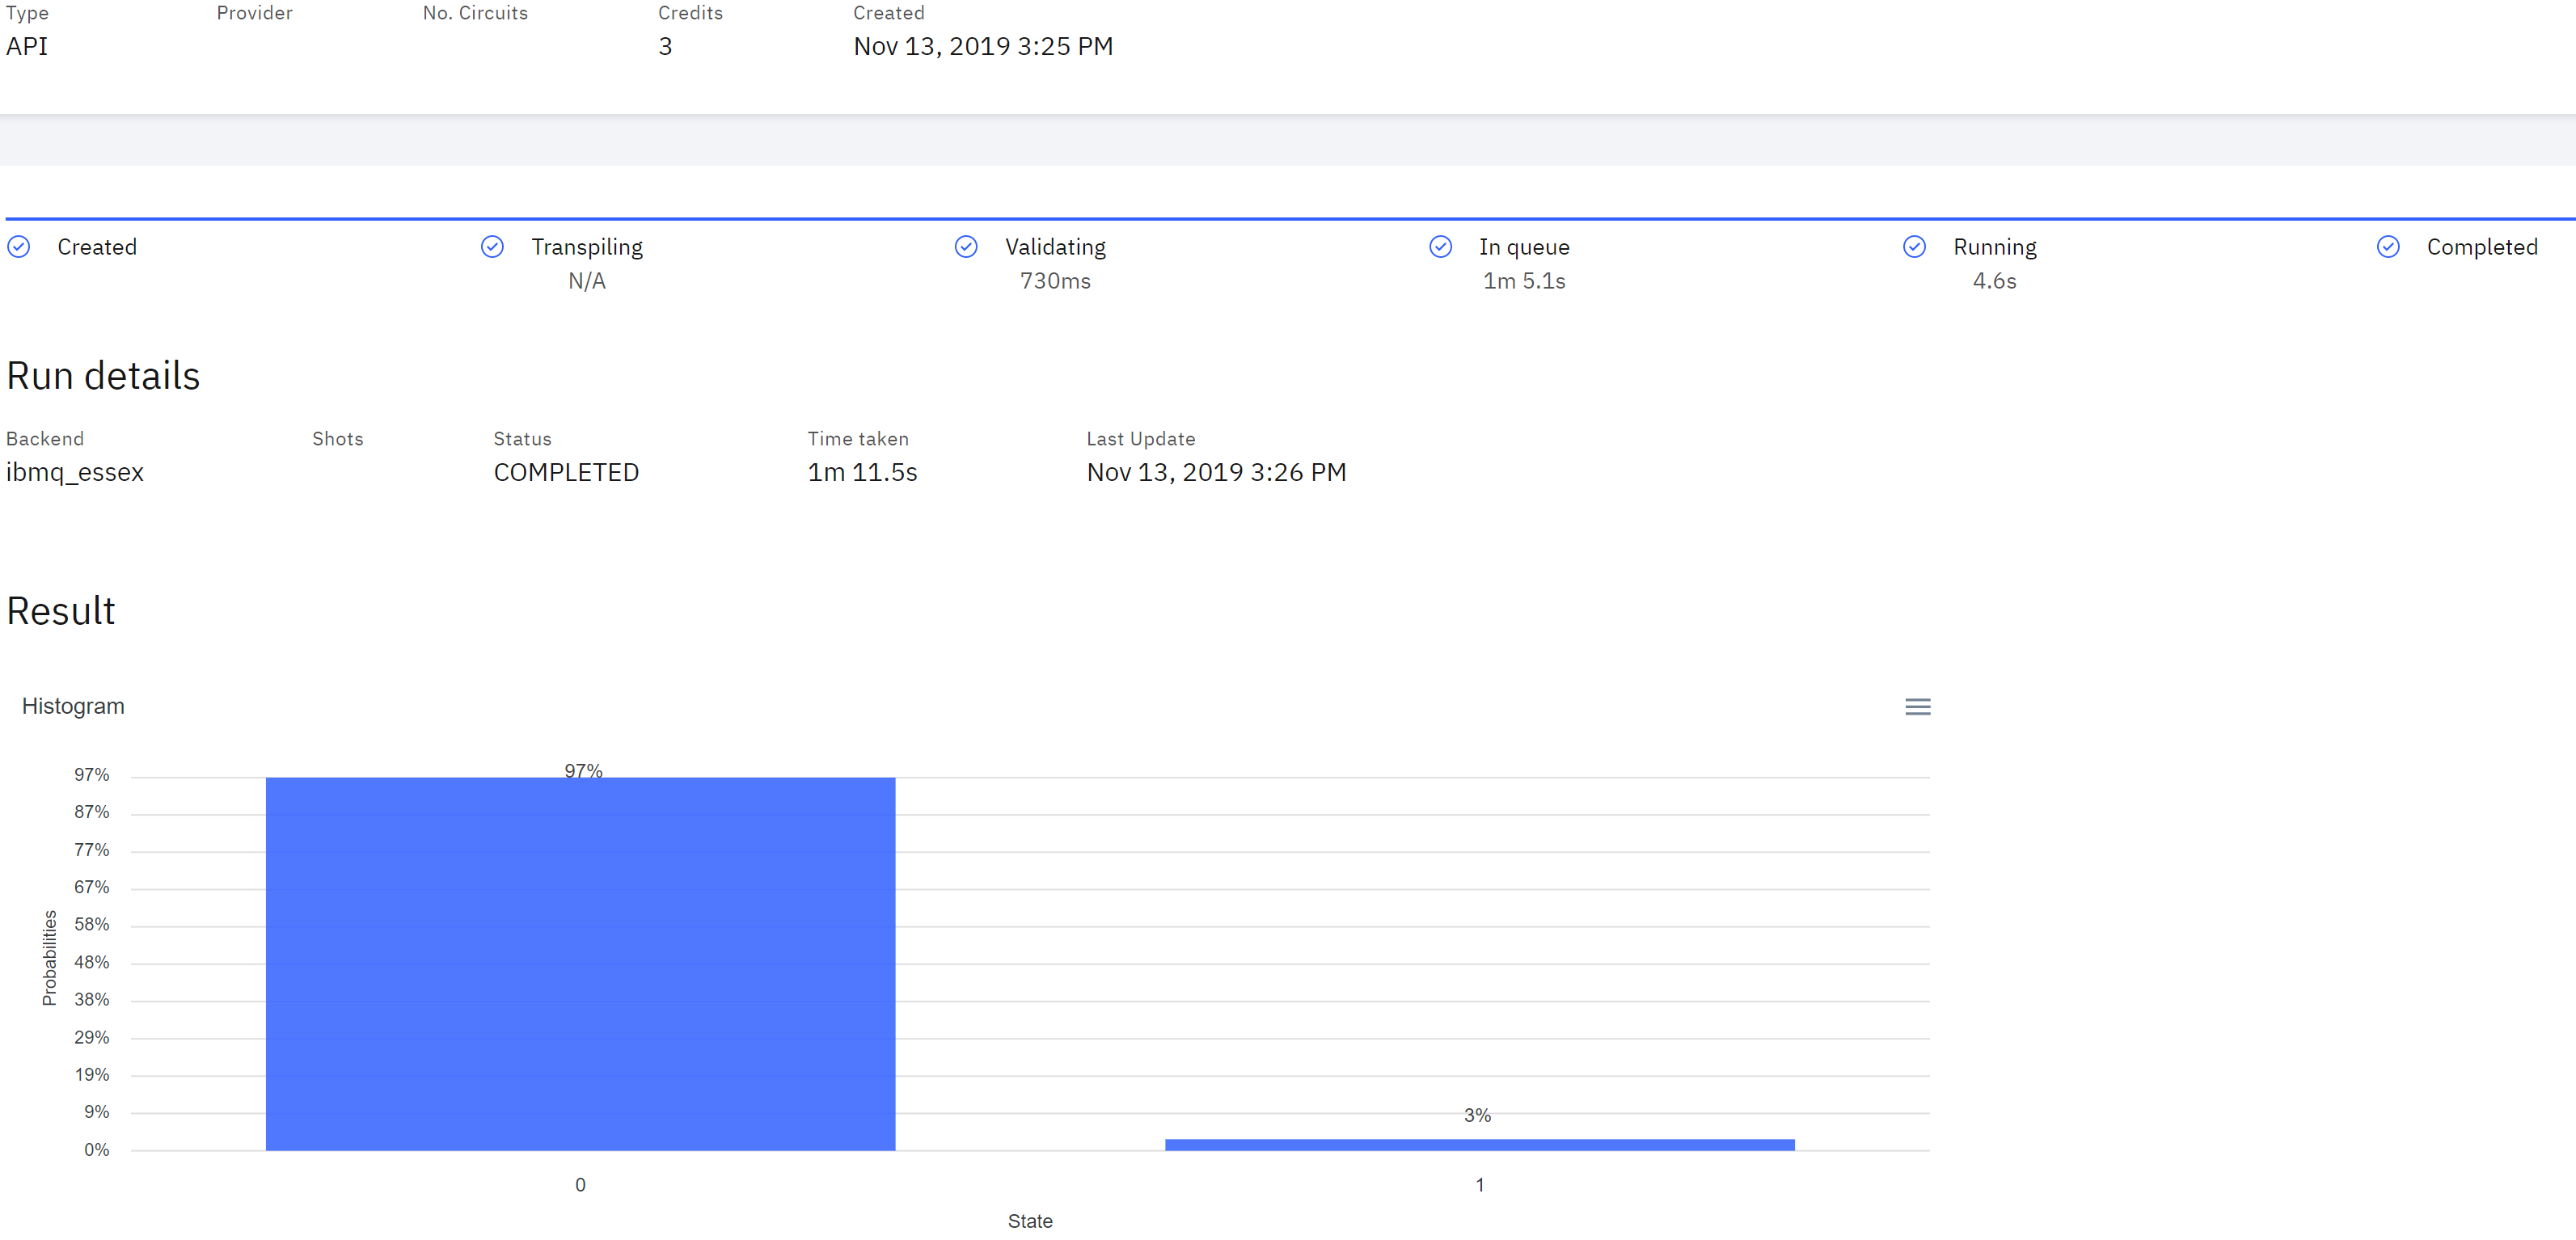
took 4.6s 1m51s in queue 3 credits 

In [16]:
loss=cost(value,target)

In [17]:
print(alpha.grad)
print(model.theta.grad)

None
None


In [18]:
loss.backward()

This was 8 jobs. Each was ~4.5s (100 shots)

In [19]:
print(alpha.grad)
print(model.theta.grad)

None
tensor(-0.1383)


In [15]:
for i in range(200):
    print(time.strftime("%Y%m%d_%H%M%S"))
    for p in model.named_parameters():
        print(p)
    opt.zero_grad()
    value=model(alpha,beta)
    loss=cost(value,target)
    loss.backward()
    opt.step()

20191113_004202
('phi', Parameter containing:
tensor(0., requires_grad=True))
('theta', Parameter containing:
tensor(0., requires_grad=True))
20191113_004518
('phi', Parameter containing:
tensor(0.1000, requires_grad=True))
('theta', Parameter containing:
tensor(0.1000, requires_grad=True))
20191113_004824
('phi', Parameter containing:
tensor(0.0761, requires_grad=True))
('theta', Parameter containing:
tensor(0.1034, requires_grad=True))
20191113_005129
('phi', Parameter containing:
tensor(0.0269, requires_grad=True))
('theta', Parameter containing:
tensor(0.1528, requires_grad=True))


KeyboardInterrupt: 